### EDA

In [65]:
import pandas as pd
import numpy  as np
import matplotlib
from matplotlib import pylab as plt

In [66]:
df = pd.read_csv('Suicide Rate ML.csv')

In [67]:
df.head()

,country,year,sex,age,population,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,796,Boomers


In [37]:
df['age']

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
27815    35-54 years
27816      75+ years
27817     5-14 years
27818     5-14 years
27819    55-74 years
Name: age, Length: 27820, dtype: object

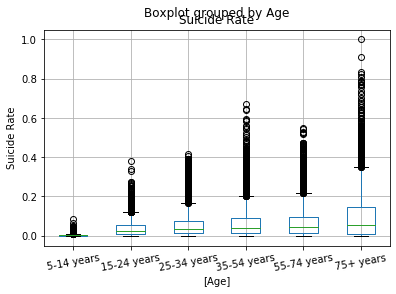

In [59]:
df[['Suicide Rate','Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=10)
plt.xticks([1,2,3,4,5,6],['5-14 years','15-24 years', '25-34 years',
                                       '35-54 years','55-74 years','75+ years'])
plt.savefig('SR_AgeGroup',dpi=300)
plt.show()

In [64]:
df[['Suicide Rate','Generation']].boxplot(by='Generation')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=20)
plt.savefig('SR_Generations',dpi=300)
plt.show()

KeyError: "['Generation'] not in index"

In [61]:
df = pd.read_csv('Suicide Rate Preprocessed.csv')

In [47]:
df.head()

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Age,Year,Population,GDP per capita
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.064516,-0.391617,-0.850864
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.064516,-0.392870,-0.850864
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.064516,-0.397548,-0.850864
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.064516,-0.466035,-0.850864
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.064516,-0.401485,-0.850864


In [ ]:
df[['suicides/100k pop','generation']].boxplot(by='generation')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=45)
plt.savefig('SR_Generations',dpi=300)
plt.show()

In [8]:
df.shape

(27820, 114)

Correlation Matrix

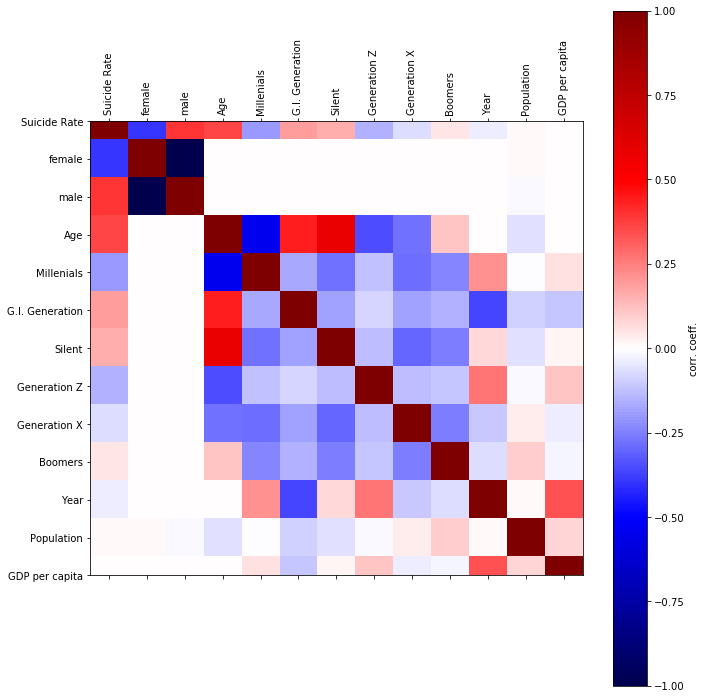

In [9]:
corrmat = df.iloc[:,101:].corr()

all_cols = np.abs(corrmat).sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
#plt.savefig('CM1',dpi=300)
plt.show()

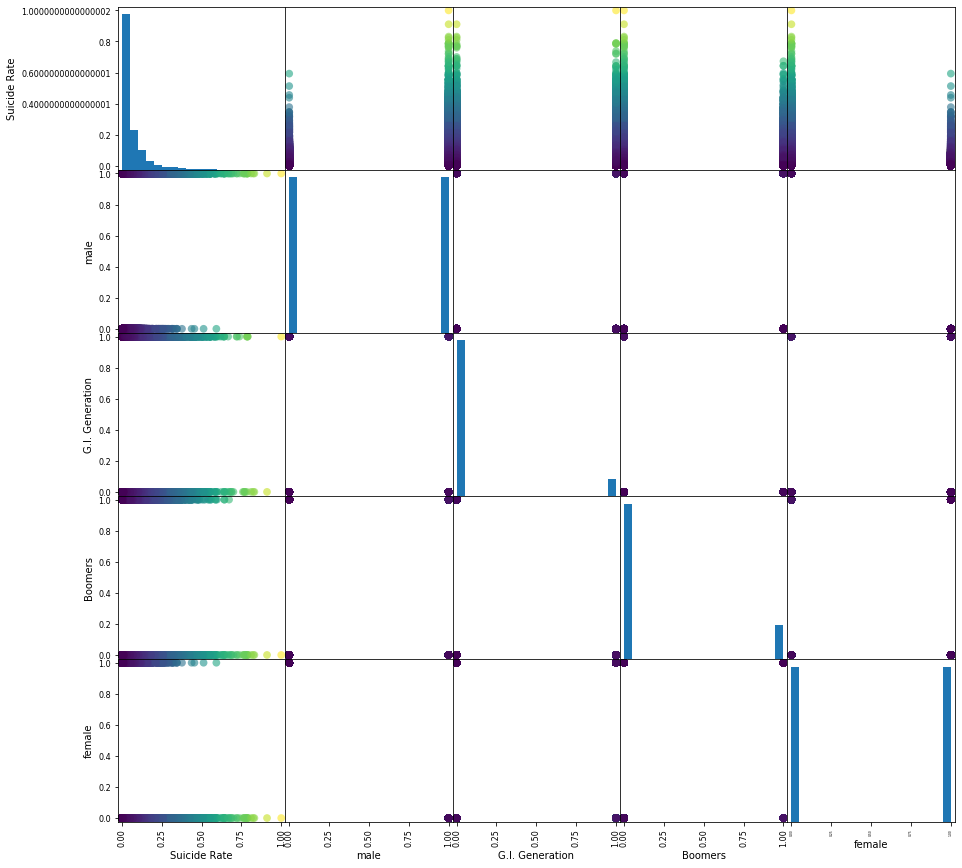

In [12]:
corrmat = df.iloc[:,101:106].corr()

all_cols = corrmat.sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols

pd.plotting.scatter_matrix(df[cols],c = df['Suicide Rate'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.6)
plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)
#plt.savefig('PP1',dpi=300)
plt.show()

In [ ]:
corrmat = df.iloc[:,:102].corr()
all_cols = np.abs(corrmat).sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols[:10]

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
#plt.savefig('CM2',dpi=300)
plt.show()

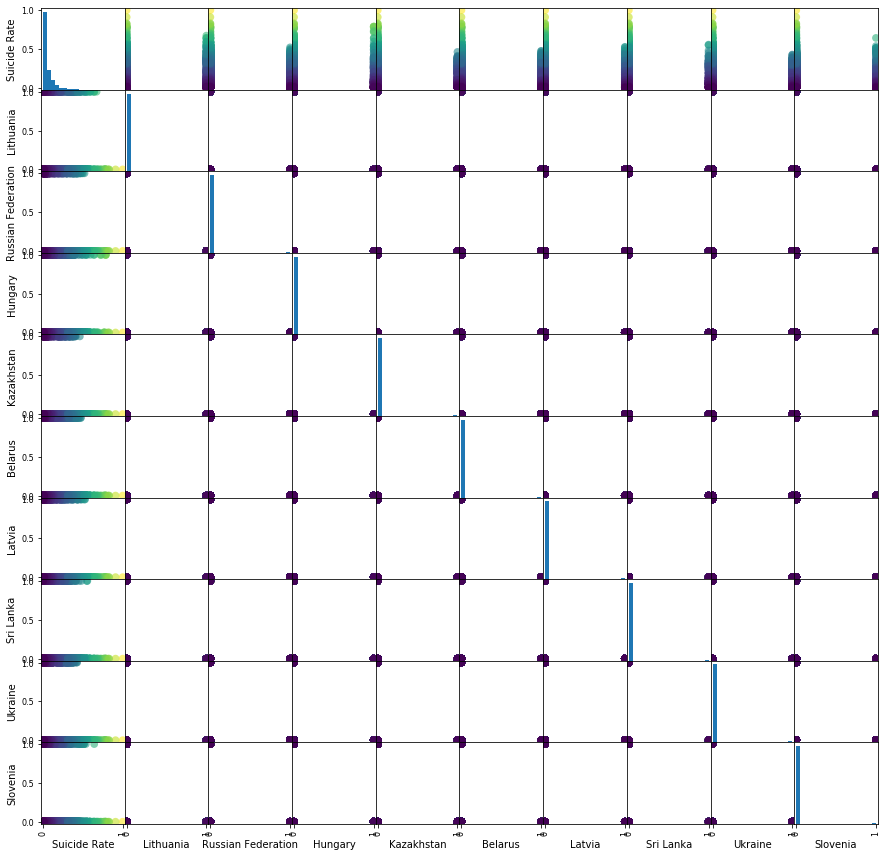

In [7]:
corrmat = df.iloc[:,:102].corr()


all_cols = corrmat.sort_values('Suicide Rate',ascending=False)['Suicide Rate'].index 
cols = all_cols[:10]

pd.plotting.scatter_matrix(df[cols],c = df['Suicide Rate'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.6)
#plt.savefig('PP2',dpi=300)
plt.show()

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression

In [9]:
y = df['Suicide Rate'].values
df.drop(columns=['Suicide Rate'],inplace=True)
X = df.values
feature_names = df.columns

In [10]:
mi = mutual_info_regression(X, y)
f_select_mi = SelectKBest(mutual_info_regression,k=10)
X_f_mi = f_select_mi.fit_transform(X,y)
feature_names[f_select_mi.get_support()]

Index(['Antigua and Barbuda', 'female', 'male', 'Boomers', 'Generation Z',
       'Millenials', 'Silent', 'Age', 'Population', 'GDP per capita'],
      dtype='object')

In [11]:
f_test, p_values = f_regression(X, y)
f_select = SelectKBest(f_regression,k=10)
X_f = f_select.fit_transform(X,y)
feature_names[f_select.get_support()]

Index(['Hungary', 'Lithuania', 'Russian Federation', 'female', 'male',
       'G.I. Generation', 'Generation Z', 'Millenials', 'Silent', 'Age'],
      dtype='object')

In [12]:
mi_feature = feature_names[f_select_mi.get_support()]
ftest_feature = feature_names[f_select.get_support()]
print(set(mi_feature) | set(ftest_feature))
len(set(mi_feature) | set(ftest_feature))

{'Antigua and Barbuda', 'Population', 'GDP per capita', 'Generation Z', 'Age', 'Silent', 'Russian Federation', 'female', 'Hungary', 'Boomers', 'Millenials', 'G.I. Generation', 'Lithuania', 'male'}


14

Top features correlated with Suicide Rate:
<br>
{Antigua and Barbuda, Population, GDP per capita, Generation Z, Age, Silent, Russian Federation, female, Hungary, Boomers, Millenials, G.I. Generation, Lithuania, male}

#### General Overviews

In [182]:
df = pd.read_csv('Suicide Rate Preprocessed.csv')

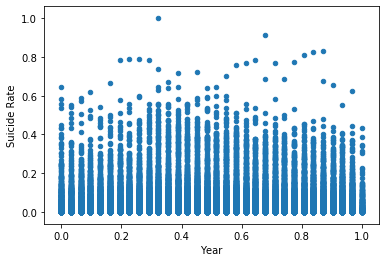

In [183]:
df.plot.scatter('Year','Suicide Rate')
#plt.savefig('SR_Year',dpi=300)
plt.show()

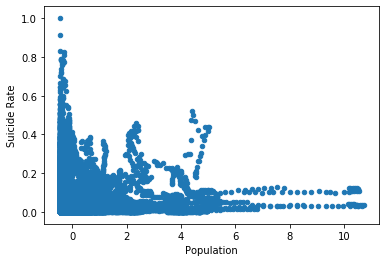

In [122]:
df.plot.scatter('Population','Suicide Rate')
#plt.savefig('SR_Population',dpi=300)
plt.show()

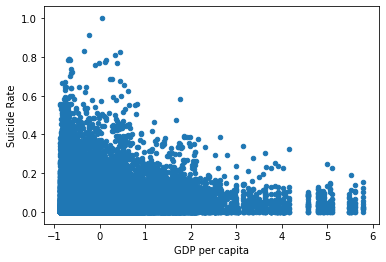

In [123]:
df.plot.scatter('GDP per capita','Suicide Rate')
#plt.savefig('SR_GDP',dpi=300)
plt.show()

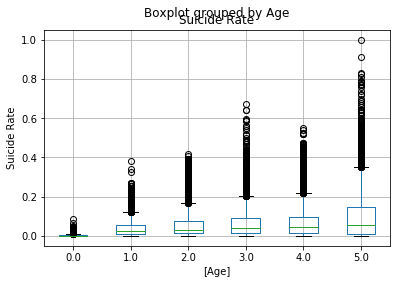

In [124]:
df[['Suicide Rate','Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_Age',dpi=300)
plt.show()

In [125]:
print(df.groupby(['Age']).mean()['Suicide Rate'])

Age
0.0    0.002756
1.0    0.039770
2.0    0.054171
3.0    0.066442
4.0    0.071812
5.0    0.106483
Name: Suicide Rate, dtype: float64


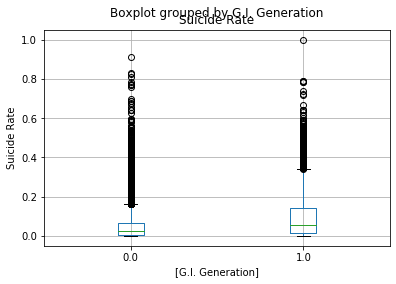

In [126]:
df[['Suicide Rate','G.I. Generation']].boxplot(by='G.I. Generation')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_GIgen',dpi=300)
plt.show()

In [127]:
print(df.groupby(['G.I. Generation']).mean()['Suicide Rate'])

G.I. Generation
0.0    0.051554
1.0    0.106443
Name: Suicide Rate, dtype: float64


In [177]:
(0.106443-0.051554)/0.051554

1.0646894518369088

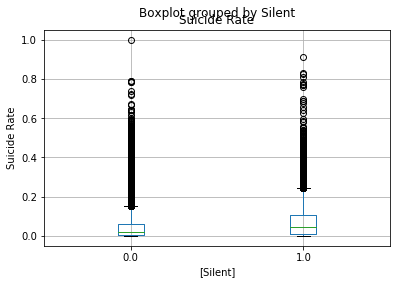

In [128]:
df[['Suicide Rate','Silent']].boxplot(by='Silent')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_Silent',dpi=300)
plt.show()

In [129]:
print(df.groupby(['Silent']).mean()['Suicide Rate'])

Silent
0.0    0.049581
1.0    0.081872
Name: Suicide Rate, dtype: float64


In [178]:
(0.081872-0.049581)/0.049581

0.6512777071862206

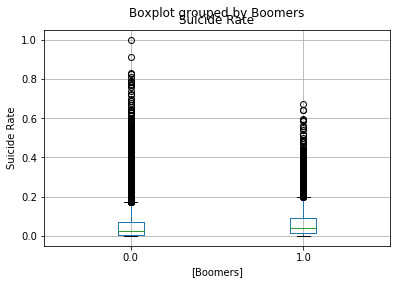

In [130]:
df[['Suicide Rate','Boomers']].boxplot(by='Boomers')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_Boomers',dpi=300)
plt.show()

In [131]:
print(df.groupby(['Boomers']).mean()['Suicide Rate'])

Boomers
0.0    0.055097
1.0    0.065529
Name: Suicide Rate, dtype: float64


In [179]:
(0.065529-0.055097)/0.055097

0.18933880247563395

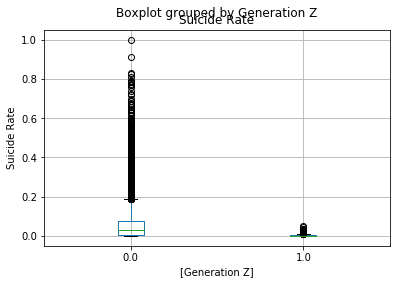

In [132]:
df[['Suicide Rate','Generation Z']].boxplot(by='Generation Z')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_GenZ',dpi=300)
plt.show()

In [133]:
print(df.groupby(['Generation Z']).mean()['Suicide Rate'])

Generation Z
0.0    0.059987
1.0    0.002855
Name: Suicide Rate, dtype: float64


In [181]:
(0.059987-0.002855)/0.059987

0.9524063547101873

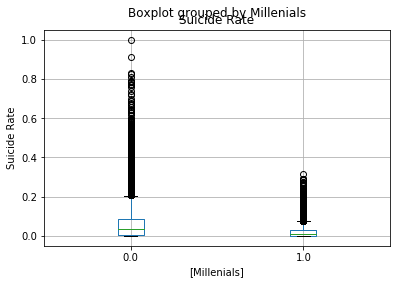

In [134]:
df[['Suicide Rate','Millenials']].boxplot(by='Millenials')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_Millenials',dpi=300)
plt.show()

In [135]:
print(df.groupby(['Millenials']).mean()['Suicide Rate'])

Millenials
0.0    0.065754
1.0    0.023930
Name: Suicide Rate, dtype: float64


In [180]:
(0.065754-0.023930)/0.065754

0.6360677677403657

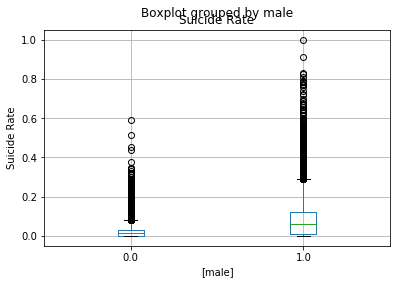

In [136]:
df[['Suicide Rate','male']].boxplot(by='male')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_male',dpi=300)
plt.show()

In [137]:
print(df.groupby(['male']).mean()['Suicide Rate'])

male
0.0    0.023971
1.0    0.089965
Name: Suicide Rate, dtype: float64


In [184]:
(0.089965-0.023971)/0.089965

0.7335519368643361

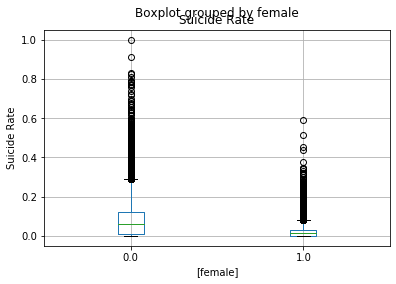

In [138]:
df[['Suicide Rate','female']].boxplot(by='female')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_female',dpi=300)
plt.show()

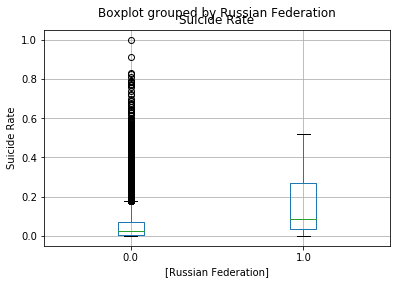

In [139]:
df[['Suicide Rate','Russian Federation']].boxplot(by='Russian Federation')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_RF',dpi=300)
plt.show()

In [140]:
print(df.groupby(['Russian Federation']).mean()['Suicide Rate'])

Russian Federation
0.0    0.055812
1.0    0.155098
Name: Suicide Rate, dtype: float64


In [1]:
(0.155098-0.055812)/0.155098

0.6401500986473069

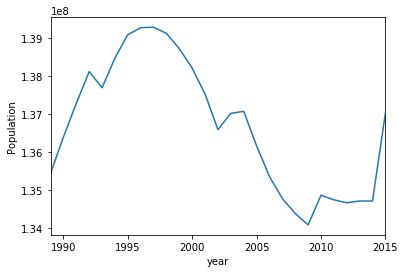

In [141]:
df_rf_pop = dfo[dfo['country'] == 'Russian Federation'].groupby(['year']).sum()['population']
df_rf_pop.plot()
plt.ylabel('Population')
#plt.savefig('RF_pop',dpi=300)

In [158]:
list(dfo.columns) 

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

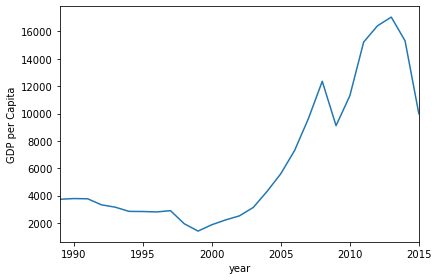

In [168]:
df_rf_gdp = dfo[dfo['country'] == 'Russian Federation'].groupby(['year']).mean()['gdp_per_capita ($)']
df_rf_gdp.plot()
plt.tight_layout()
plt.ylabel('GDP per Capita')
#plt.savefig('RF_GDP',dpi=300)

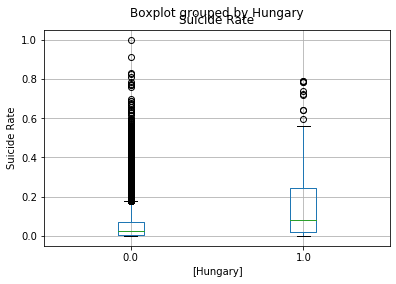

In [24]:
df[['Suicide Rate','Hungary']].boxplot(by='Hungary')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_Hungary',dpi=300)
plt.show()

In [107]:
print(df.groupby(['Hungary']).mean()['Suicide Rate'])

Hungary
0.0    0.055969
1.0    0.145626
Name: Suicide Rate, dtype: float64


In [2]:
(0.145626-0.055969)/0.145626

0.6156661585156498

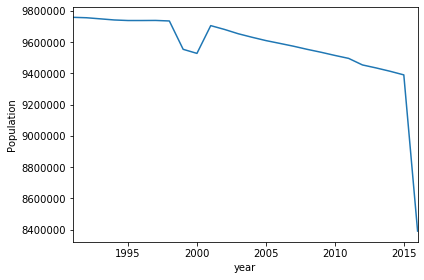

In [169]:
df_hg_pop = dfo[dfo['country'] == 'Hungary'].groupby(['year']).sum()['population']
df_hg_pop.plot()
plt.ylabel('Population')
plt.tight_layout()
#plt.savefig('Hungary_pop', dpi = 300)

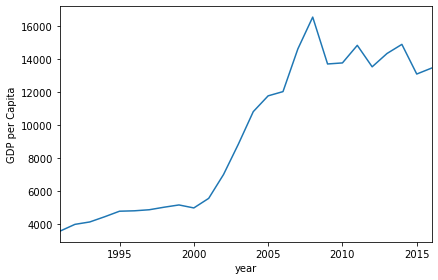

In [170]:
df_hg_gdp = dfo[dfo['country'] == 'Hungary'].groupby(['year']).mean()['gdp_per_capita ($)']
df_hg_gdp.plot()
plt.tight_layout()
plt.ylabel('GDP per Capita')
#plt.savefig('Hungary_GDP',dpi=300)

In [57]:
print(df.groupby(['Lithuania']).mean()['Suicide Rate'])

Lithuania
0.0    0.055802
1.0    0.179649
Name: Suicide Rate, dtype: float64


In [3]:
(0.179649-0.055802)/0.179649

0.6893831861017874

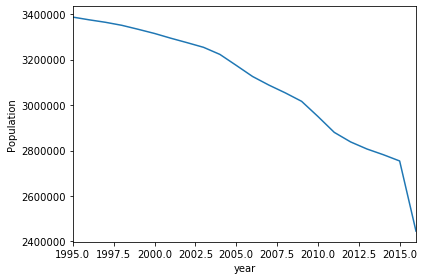

In [164]:
df_li_pop = dfo[dfo['country'] == 'Lithuania'].groupby(['year']).sum()['population']
plt.ylabel('Population')
df_li_pop.plot()
plt.tight_layout()
#plt.savefig('Lithuania_pop',dpi=300)

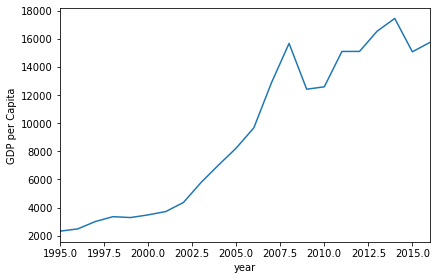

In [171]:
df_li_gdp = dfo[dfo['country'] == 'Lithuania'].groupby(['year']).mean()['gdp_per_capita ($)']
df_li_gdp.plot()
plt.tight_layout()
plt.ylabel('GDP per Capita')
#plt.savefig('Lithuania_GDP',dpi=300)

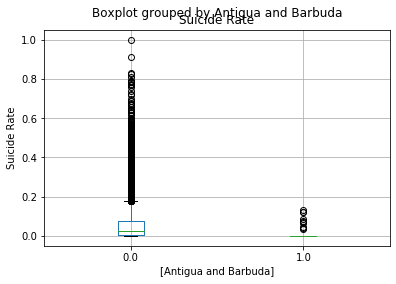

In [148]:
df[['Suicide Rate','Antigua and Barbuda']].boxplot(by='Antigua and Barbuda')
plt.ylabel('Suicide Rate')
#plt.savefig('SR_AB',dpi=300)
plt.show()

In [58]:
print(df.groupby(['Antigua and Barbuda']).mean()['Suicide Rate'])

Antigua and Barbuda
0.0    0.057610
1.0    0.002458
Name: Suicide Rate, dtype: float64


In [4]:
(0.057610-0.002458)/0.057610

0.9573337962159347

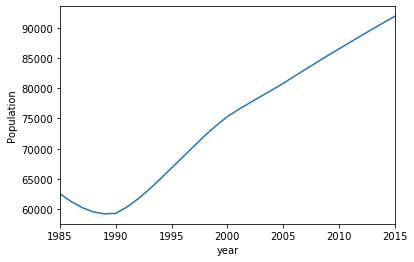

In [149]:
df_ab_pop = dfo[dfo['country'] == 'Antigua and Barbuda'].groupby(['year']).sum()['population']
plt.ylabel('Population')
df_ab_pop.plot()
#plt.savefig('AB_pop',dpi=300)

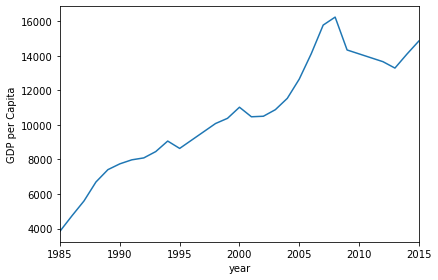

In [172]:
df_ab_gdp = dfo[dfo['country'] == 'Antigua and Barbuda'].groupby(['year']).mean()['gdp_per_capita ($)']
df_ab_gdp.plot()
plt.tight_layout()
plt.ylabel('GDP per Capita')
#plt.savefig('AB_GDP',dpi=300)

#### Difference in Genders

Age

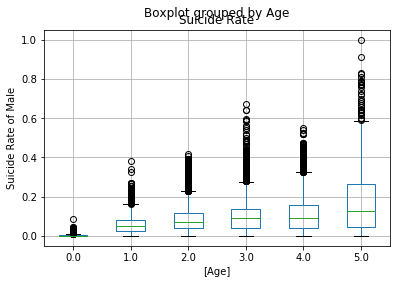

In [62]:
df[df['male'] == 1][['Suicide Rate', 'Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate of Male')
plt.show()

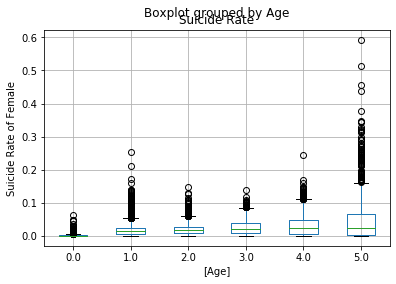

In [61]:
df[df['male'] == 0][['Suicide Rate', 'Age']].boxplot(by='Age')
plt.ylabel('Suicide Rate of Female')
plt.show()

In [7]:
dfo = pd.read_csv('Suicide Rate.csv')

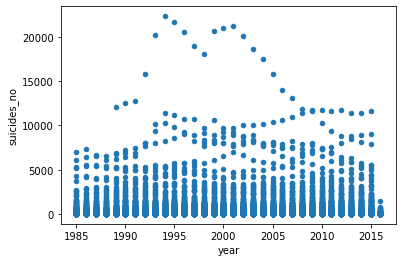

In [9]:
dfo.plot.scatter('year','suicides_no')
#plt.savefig('SR_Year',dpi=300)
plt.show()

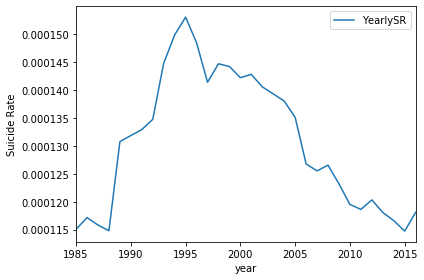

In [151]:
df_yr_sn = dfo.groupby(['year']).sum()['suicides_no']
df_yr_pop = dfo.groupby(['year']).sum()['population']
df_yr_sr = df_yr_sn/df_yr_pop

df_YearlySR = pd.DataFrame(df_yr_sr, columns = ['YearlySR'])
df_YearlySR.plot()
plt.ylabel('Suicide Rate')
plt.tight_layout()
#plt.savefig('YearlySR',dpi=300)
plt.show()